<h1>Lending Club Case</h1>

<i>A case study by Sandeep Patel and Sundar Balakrishnan</i>

In [1]:
# importing required libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Creating Dataframe out of the input csv
source_data=pd.read_csv('/Users/sundarb/Downloads/loan.csv')

<h2>Data cleanup, filling null</h2>

In [7]:
# Deleting columns with cardinality of 1 (which includes all null columns)
column_counts = source_data.nunique()
columns_to_retain = column_counts[column_counts > 1].index
clean_data_01 = source_data[columns_to_retain]

In [28]:
# Deleting columns with null percentage more than 50%
null_percentages = clean_data_01.isnull().mean() * 100
columns_to_retain = null_percentages[null_percentages <= 50].index
clean_data_02 = clean_data_01[columns_to_retain]

In [29]:
# removing unwanted columns
not_required_columns = ['id', 'member_id', 'issue_d', 'url', 'desc', 'zip_code', 'addr_state', 'earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'emp_title', 'title']
clean_data_02 = clean_data_02.drop(columns=not_required_columns)

In [54]:
# removing rows with 'Current' loan_status; Since we are going to analyse risk w.r.t. Fully paid and charged off
clean_data_03 = clean_data_02[clean_data_02['loan_status'] != 'Current']
# rounding off installments to nearest 10s.
clean_data_03['installment'] = clean_data_03['installment'].round(-1)
source_data.shape, clean_data_03.shape

((39717, 111), (38577, 32))

In [55]:
columns = list(clean_data_03.columns)
columns.remove('loan_status')

In [56]:
# Checking the null values in the cleaned data.
100 * clean_data_03.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
loan_status                0.000000
purpose                    0.000000
dti                        0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.129611
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0

In [57]:
def create_count_plot_single_val(df, col):
    cp = sns.countplot(x=col, data=df)
    for container in cp.containers:
        cp.bar_label(container)

    plt.title(f'Count of {col}')
    plt.show()


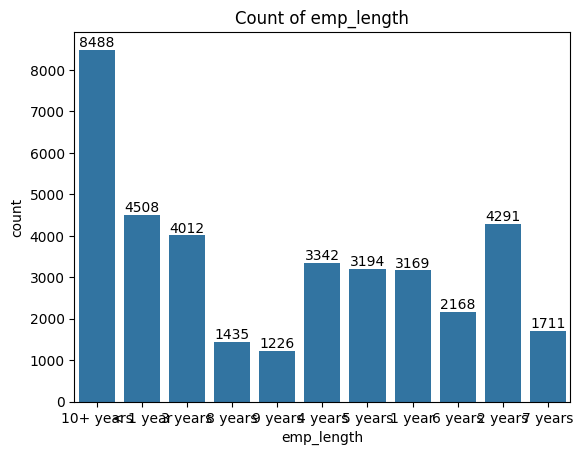

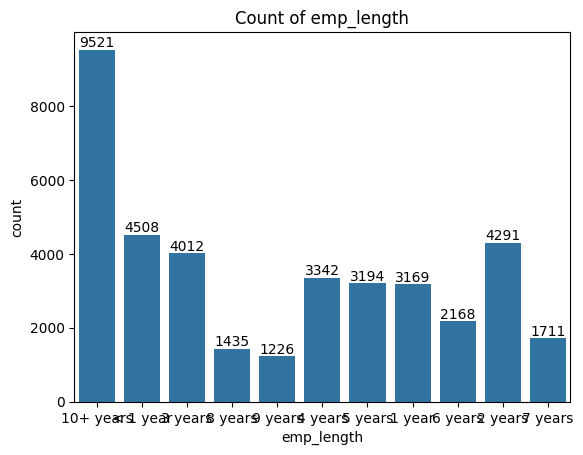

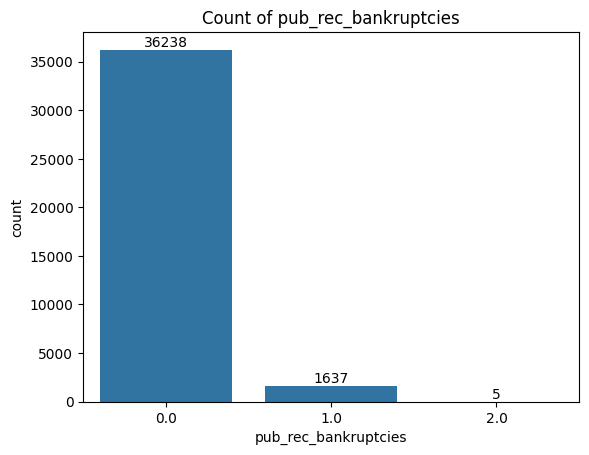

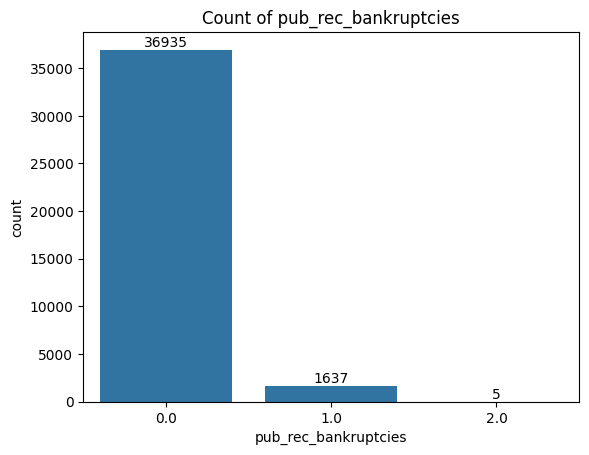

In [58]:
# imputing columns with null data. 
# Imputing emp_length with mode
# inputing pub_rec_bankruptcies with mode.

for col in ['emp_length', 'pub_rec_bankruptcies']:
    create_count_plot_single_val(clean_data_03, col)
    
    col_mode = clean_data_03[col].mode()
    clean_data_03[col] = clean_data_03[col].fillna(col_mode[0])
    
    create_count_plot_single_val(clean_data_03, col)

In [64]:
# remove % from int_rate and revol_util columns and convert to float.

column_with_percentages = ['int_rate', 'revol_util']
for col in column_with_percentages:
    clean_data_03[col] = clean_data_03[col].str.replace('%', '', regex=False).astype('float')
    clean_data_03[col] = clean_data_03[col].round(0)


In [66]:
# imputing revol_util with mean (rounded off)
col = 'revol_util'
col_mean = clean_data_03[col].mean()
clean_data_03[col] = clean_data_03[col].fillna(col_mean)

In [67]:
# now we have 0 null.
100 * clean_data_03.isnull().mean()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
loan_status                0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
pub_rec_bankruptcies       0.0
dtype: f

<h2>Analysis</h2>

<h3>Full analysis with boxplot w.r.t. loan_status to gather insights</h3>

loan_amnt


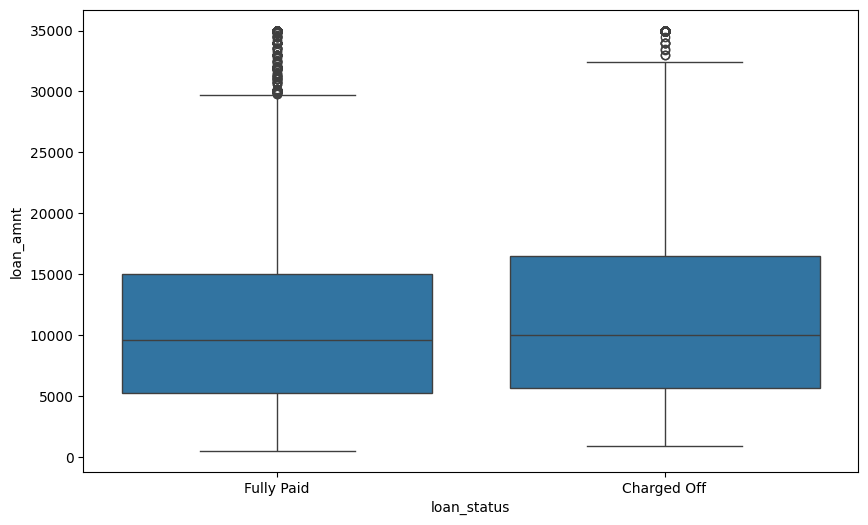

funded_amnt


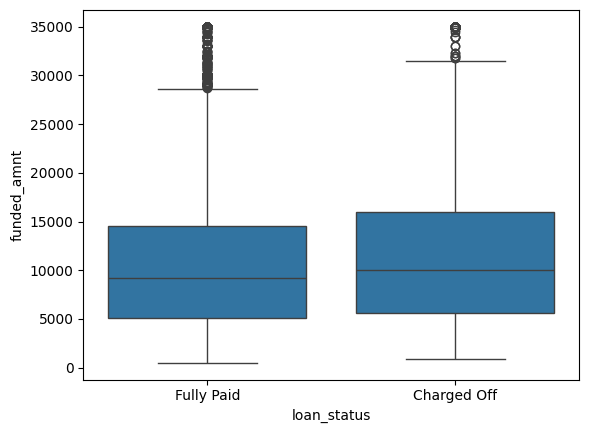

funded_amnt_inv


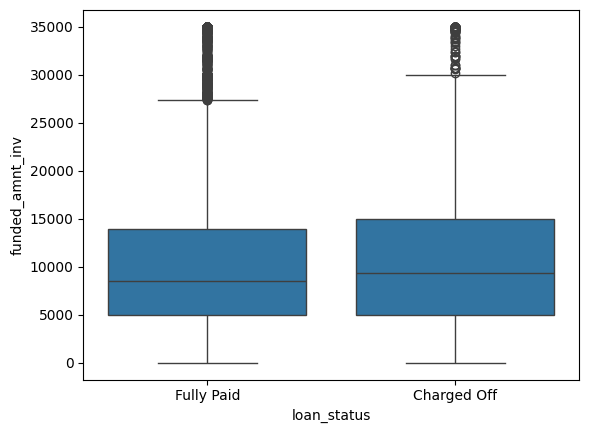

term


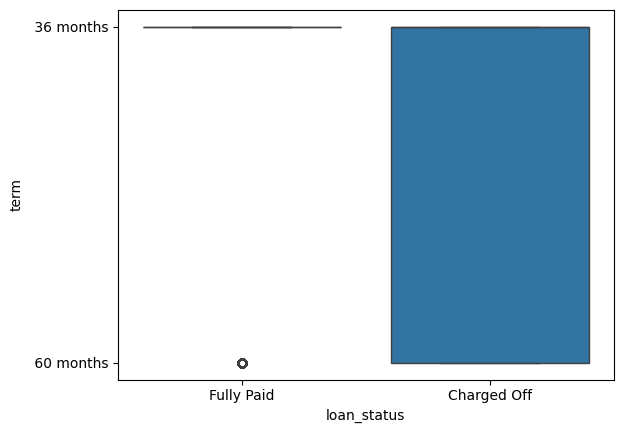

int_rate


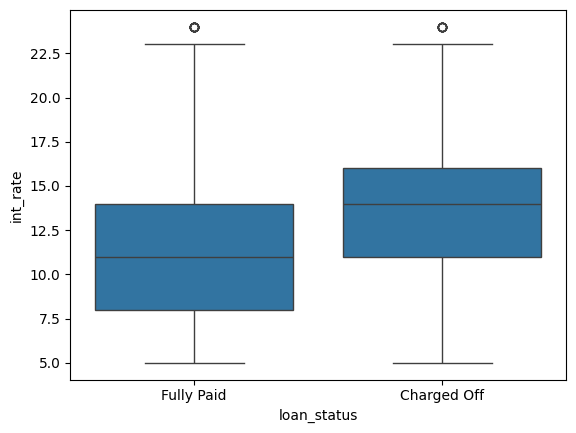

installment


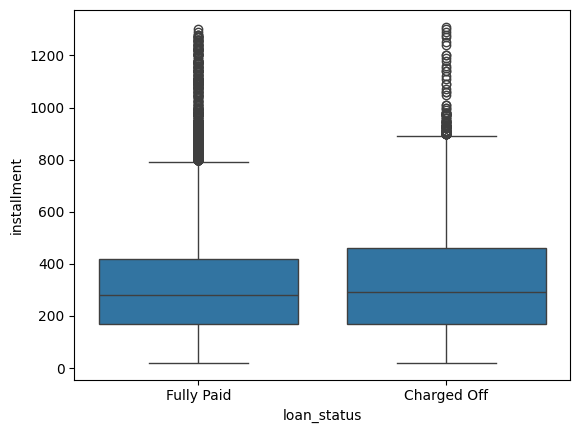

grade


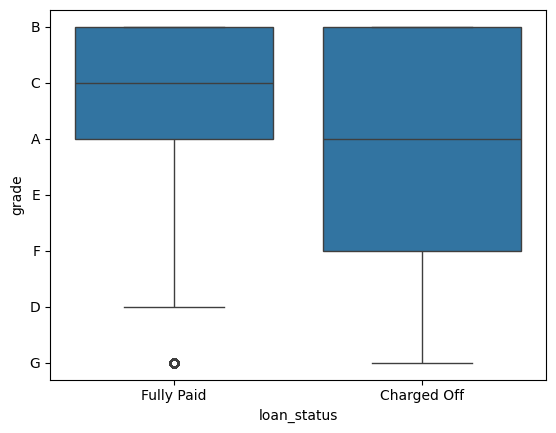

sub_grade


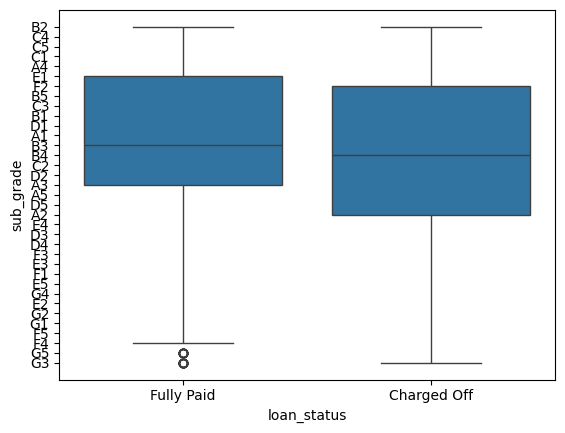

emp_length


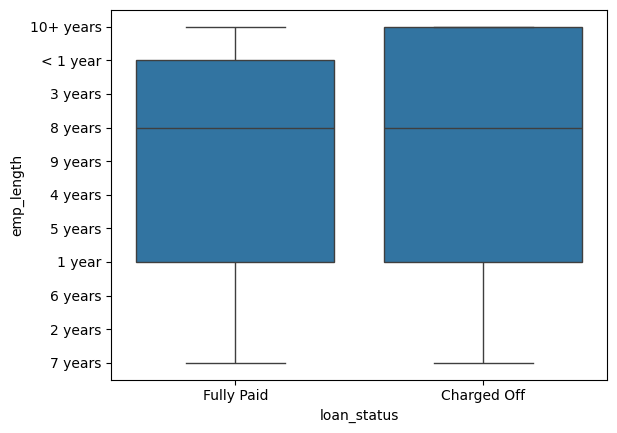

home_ownership


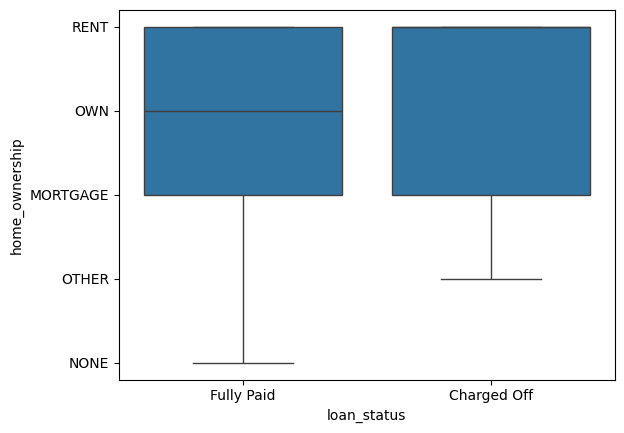

annual_inc


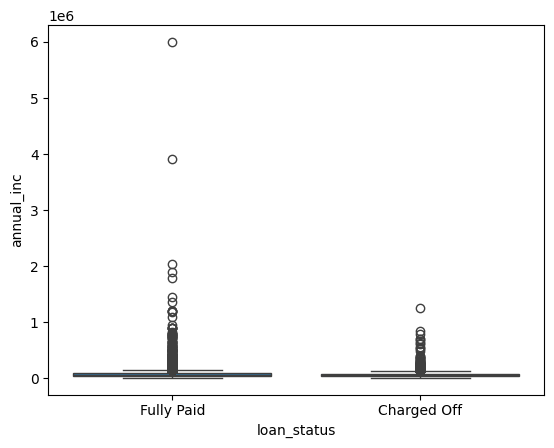

verification_status


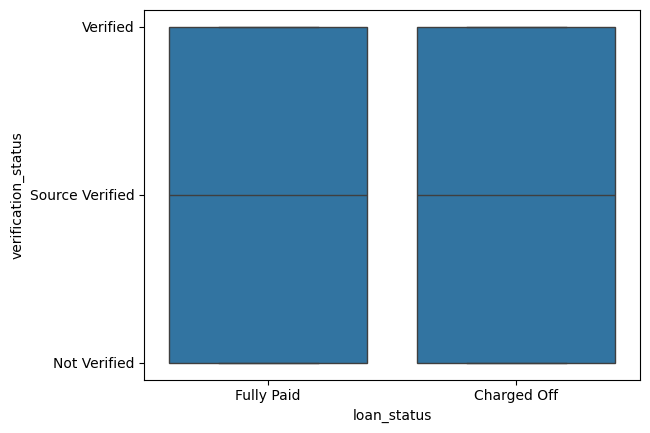

purpose


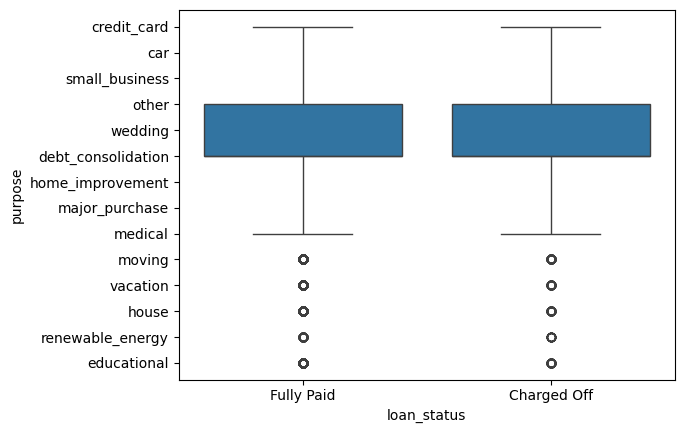

dti


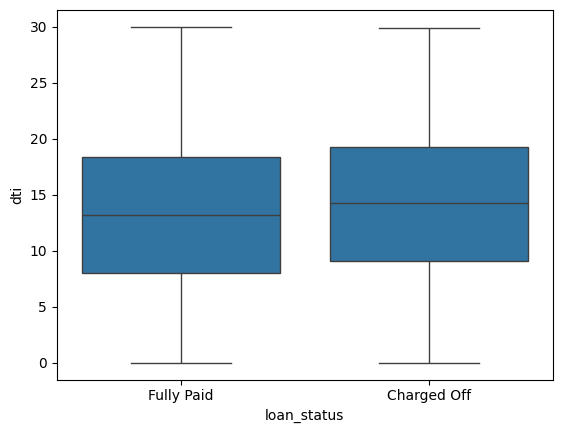

delinq_2yrs


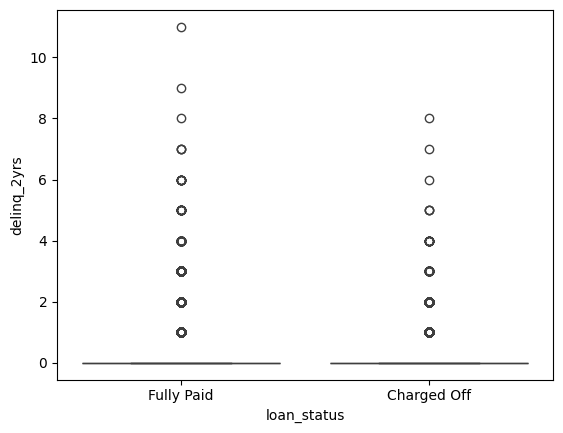

inq_last_6mths


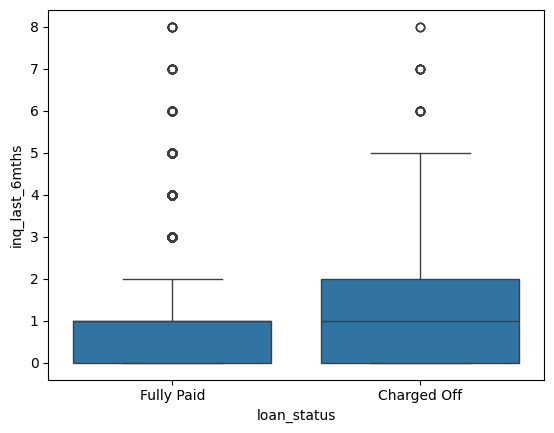

open_acc


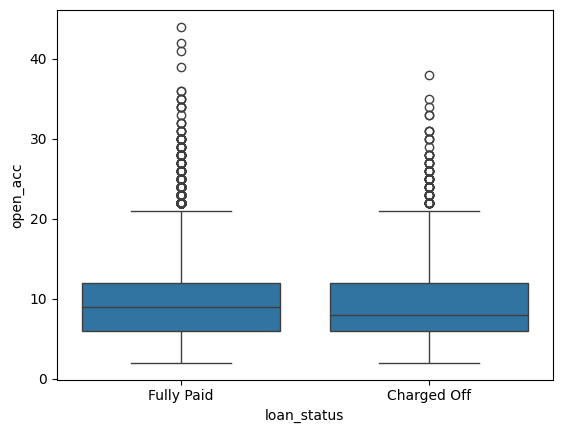

pub_rec


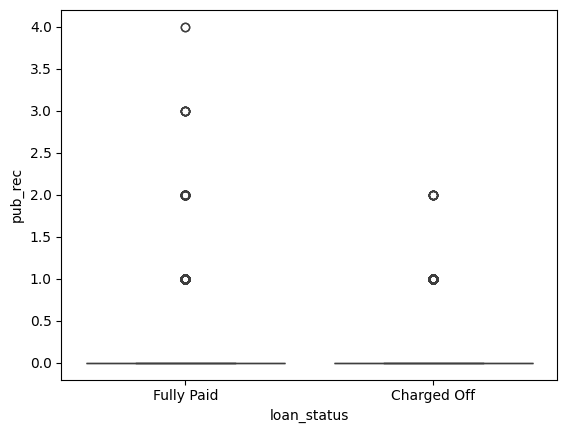

revol_bal


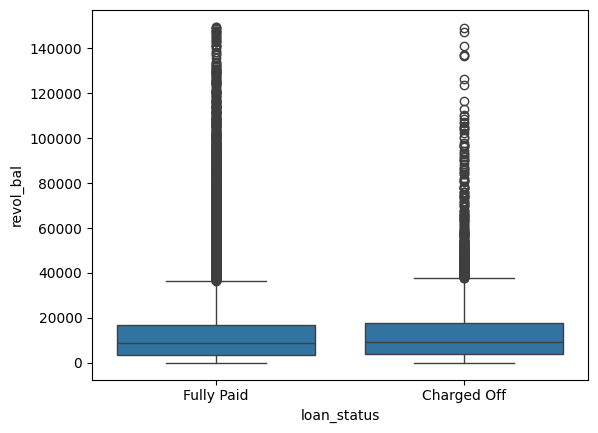

revol_util


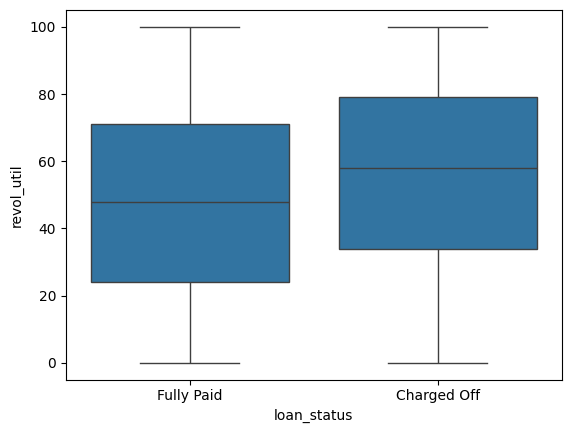

total_acc


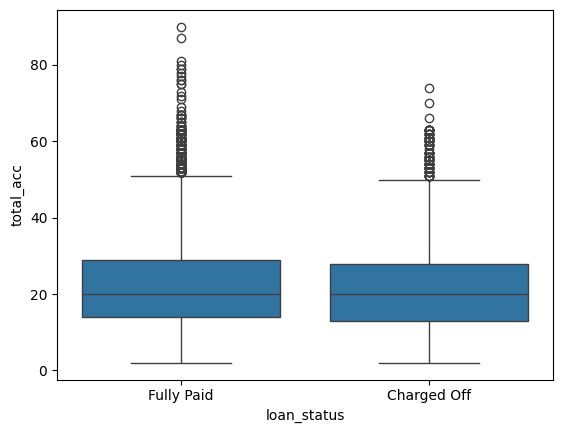

out_prncp


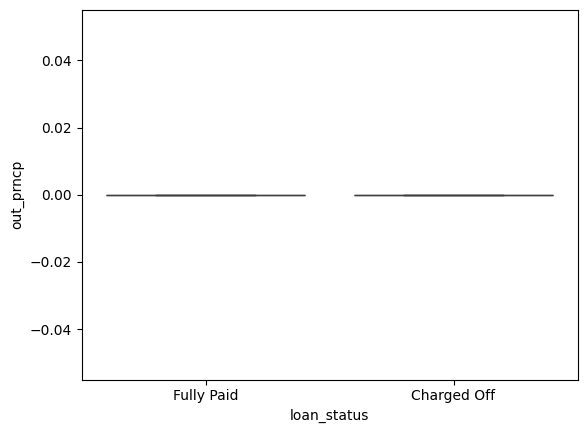

out_prncp_inv


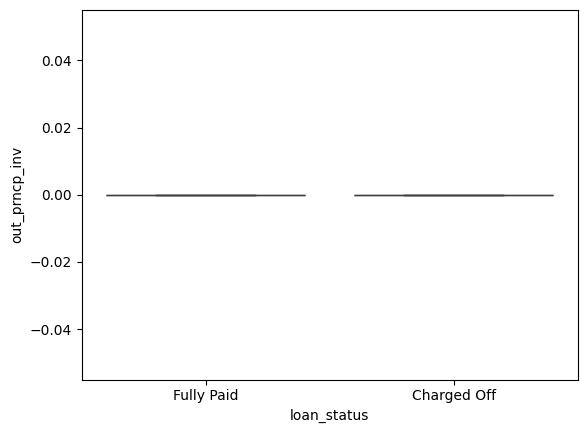

total_pymnt


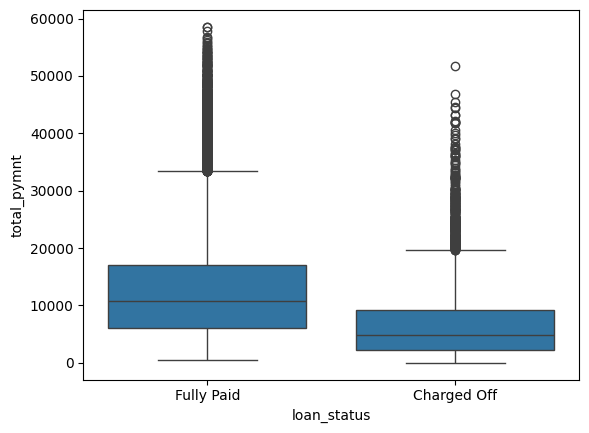

total_pymnt_inv


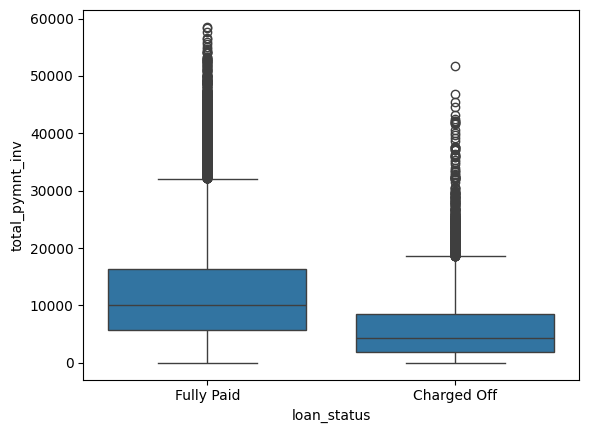

total_rec_prncp


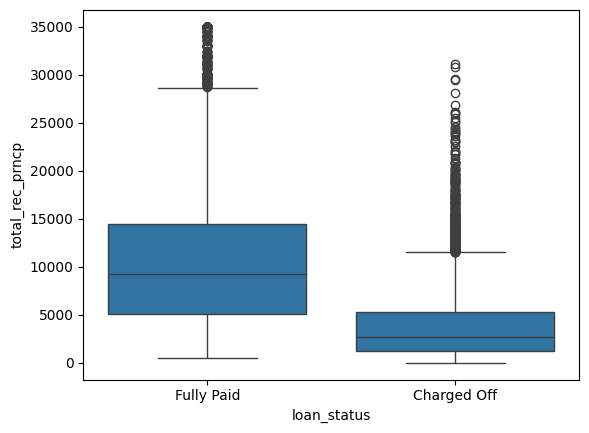

total_rec_int


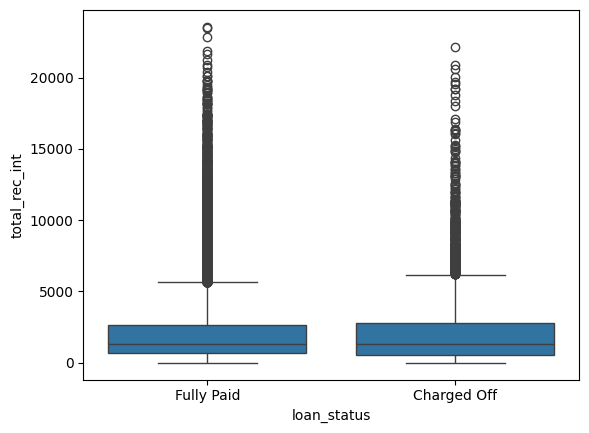

total_rec_late_fee


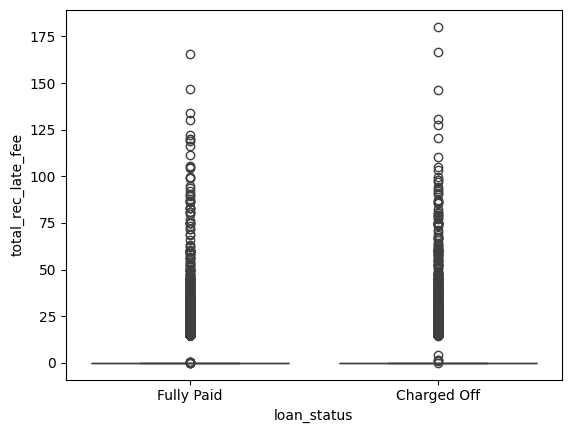

recoveries


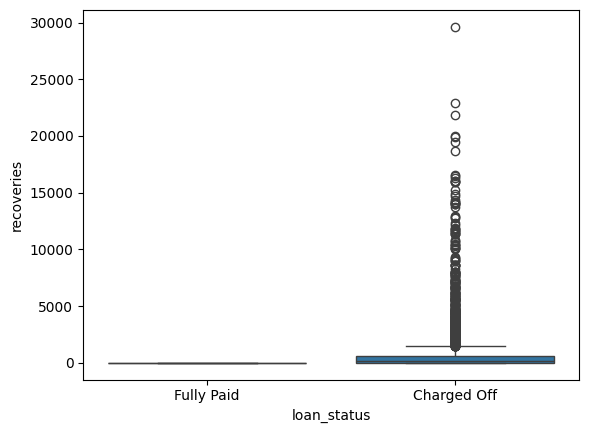

collection_recovery_fee


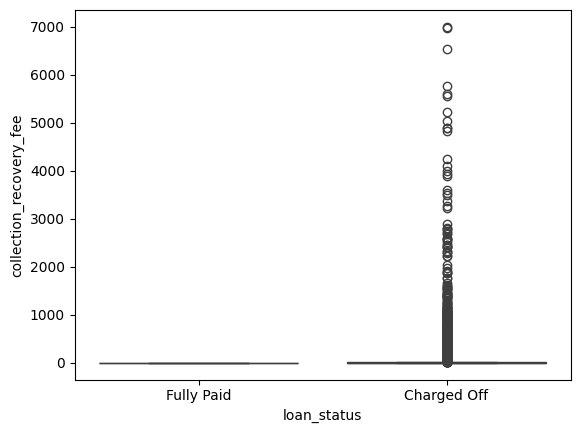

pub_rec_bankruptcies


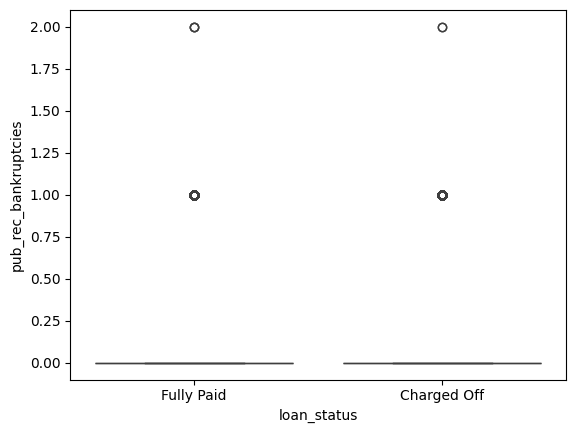

In [69]:
plt.figure(figsize=(10, 6))
for column in columns:
    print(column)
    sns.boxplot(x=clean_data_03['loan_status'], y=clean_data_03[column])
    plt.show()

In [88]:
def create_bar_plot_two_val(df, col1, col2, hue=None):
    hue_val = df[hue] if hue else None
    cp = sns.barplot(x=df[col1], y=df[col2], hue=hue_val)
    for container in cp.containers:
        cp.bar_label(container)

    plt.title(f'Comparing of {col1} and {col2}')
    plt.show()


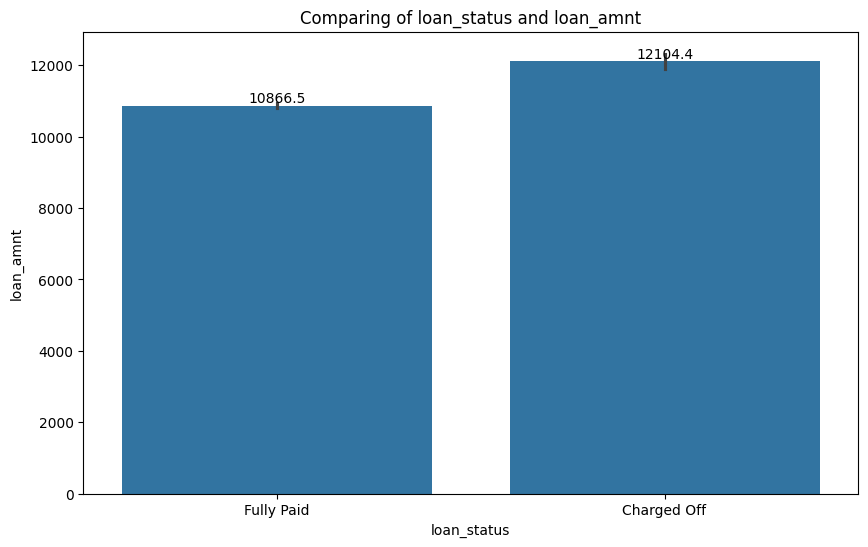

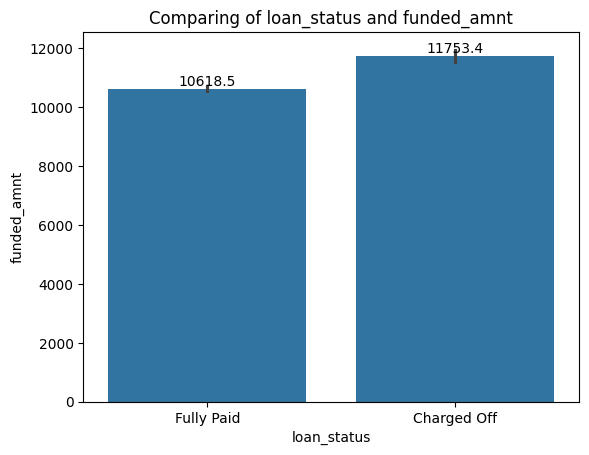

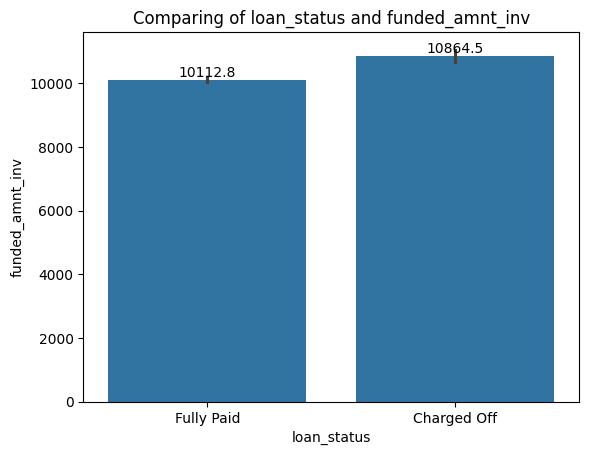

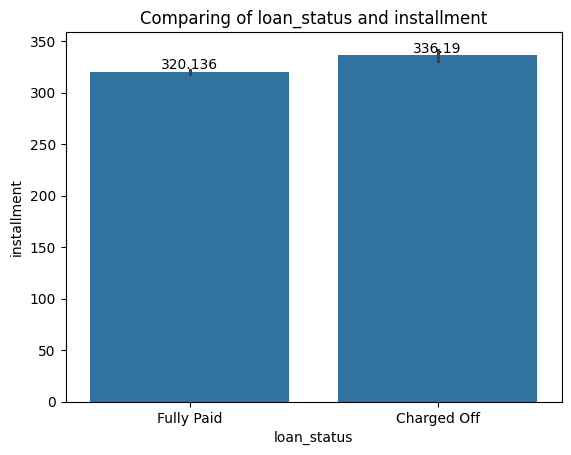

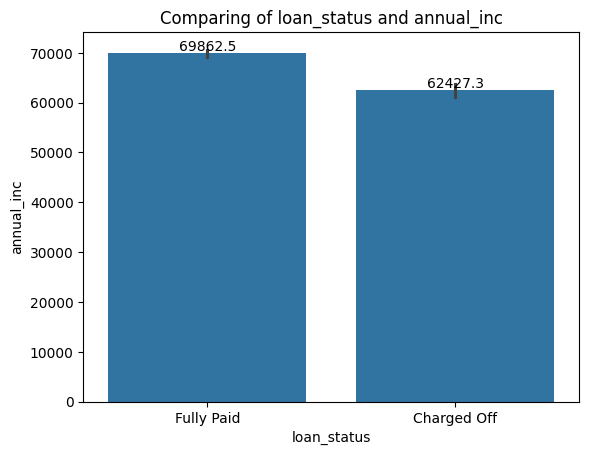

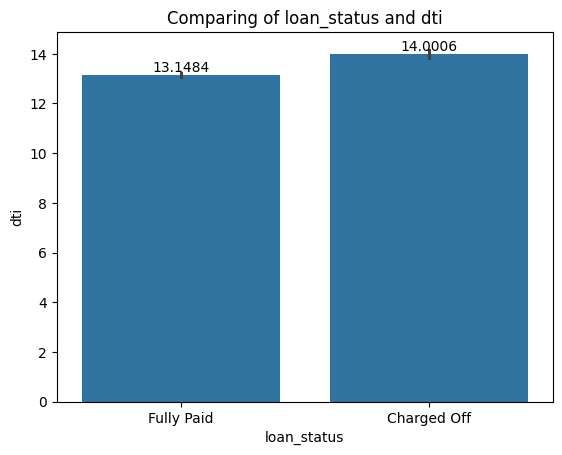

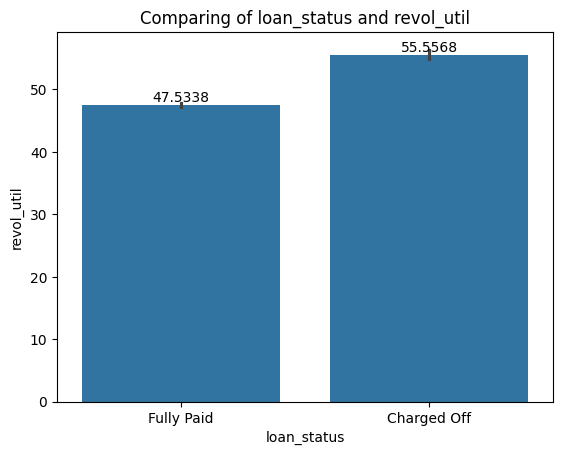

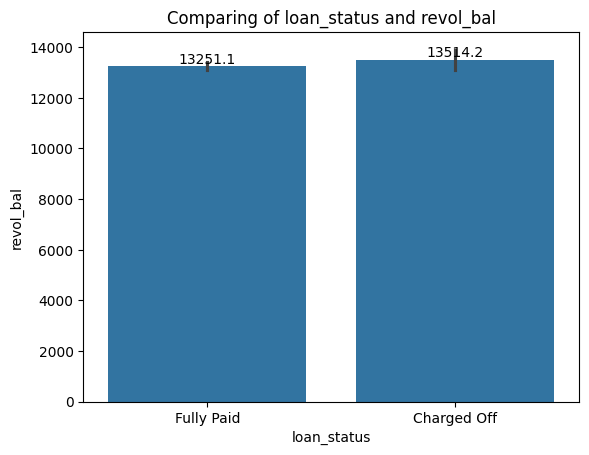

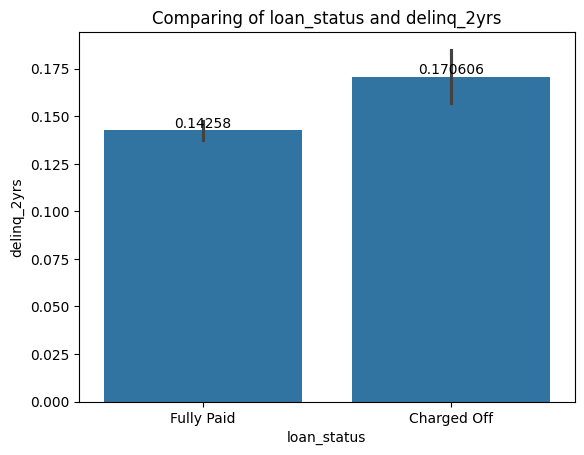

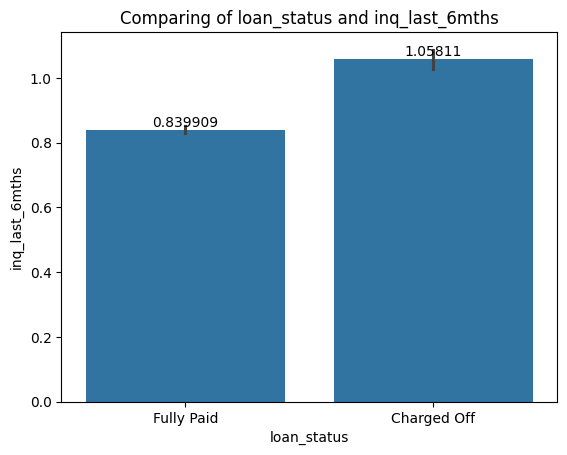

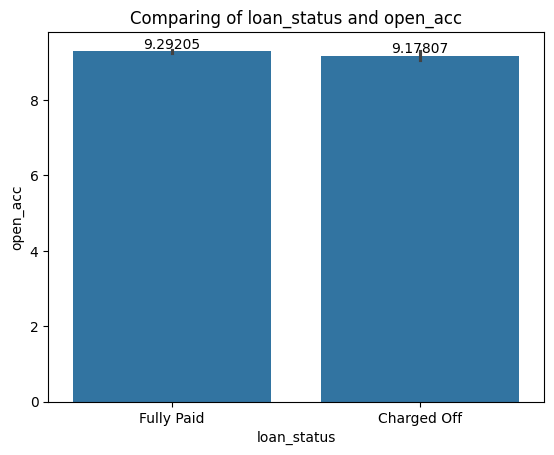

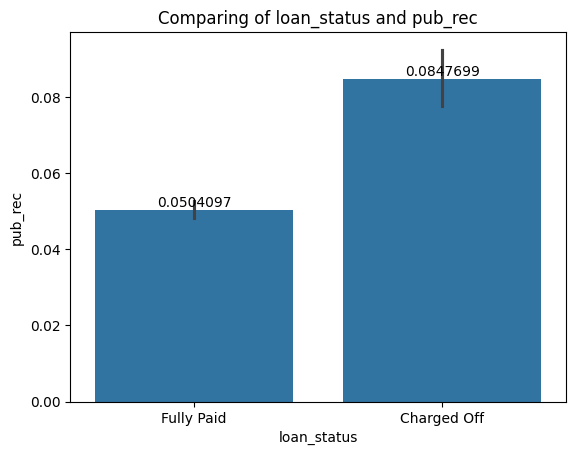

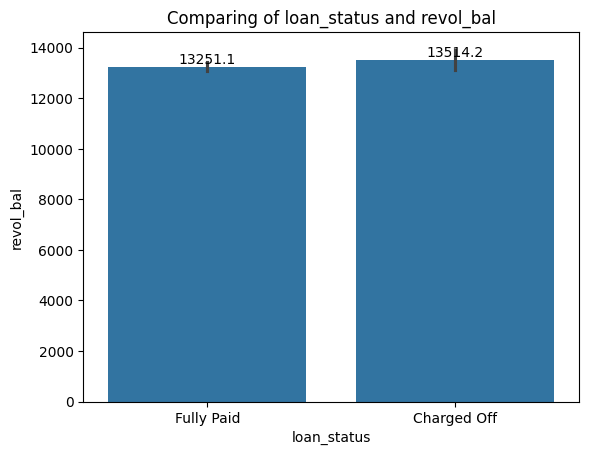

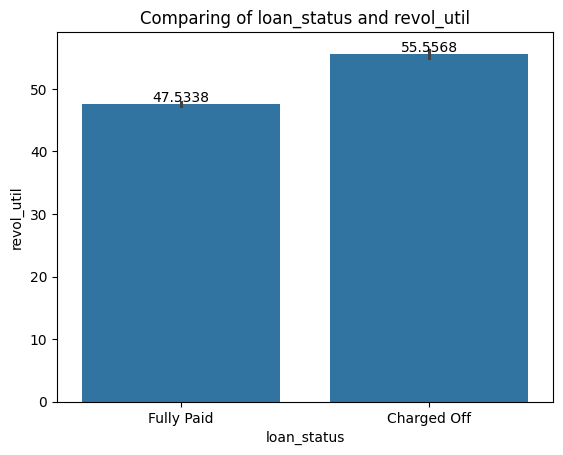

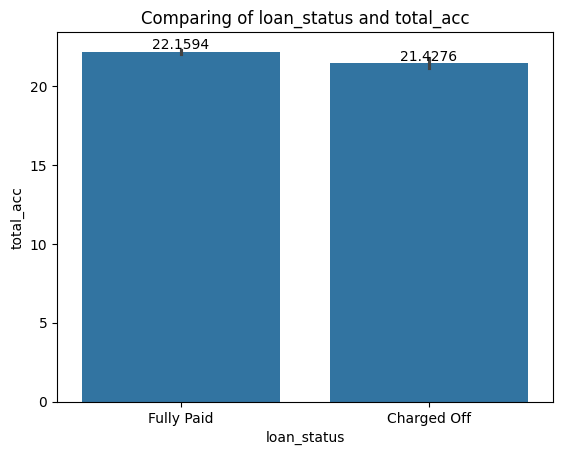

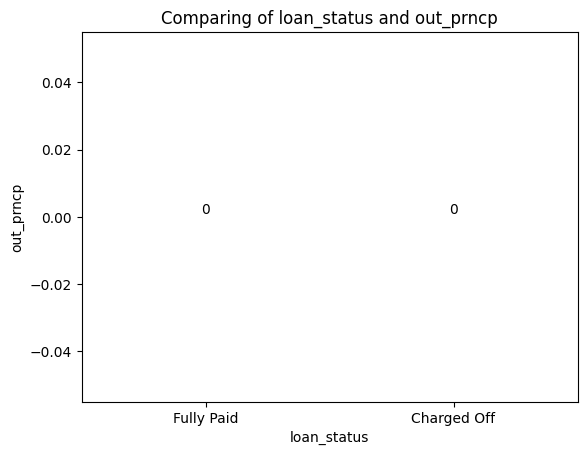

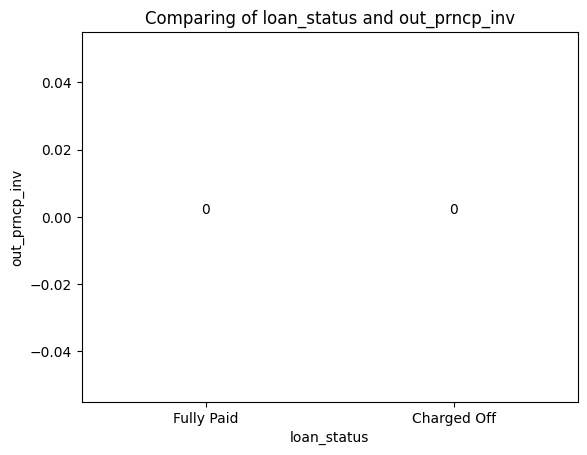

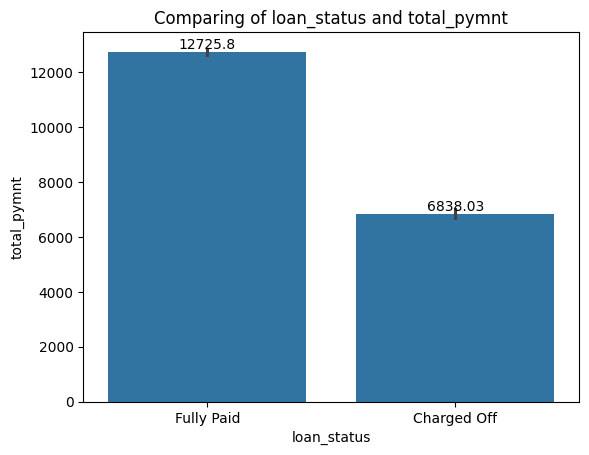

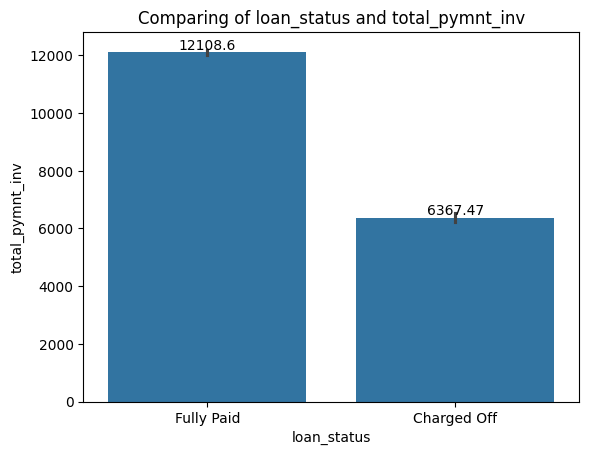

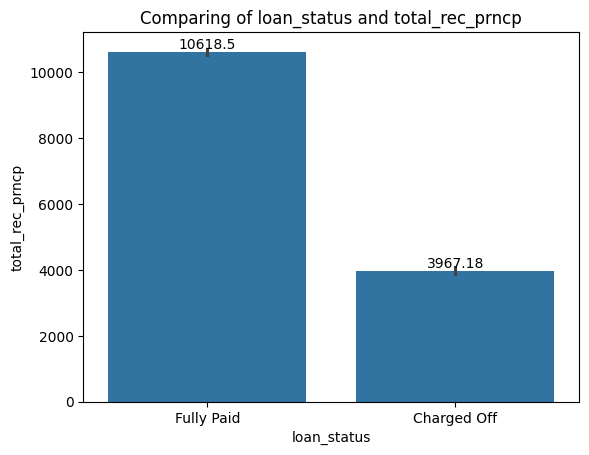

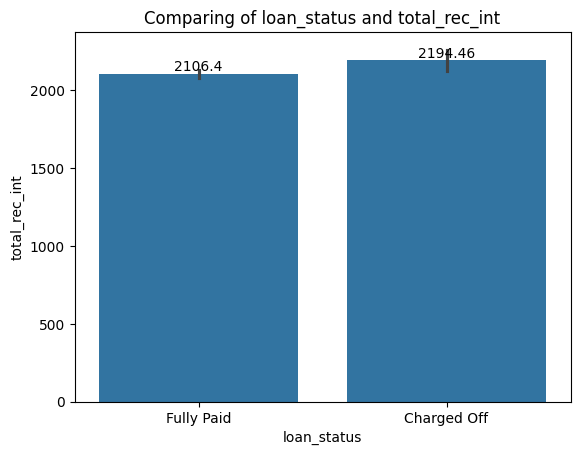

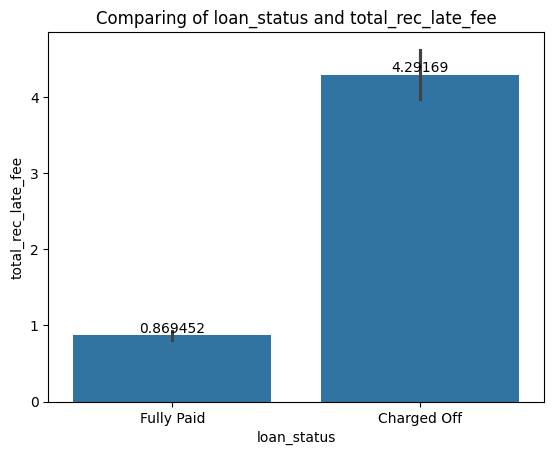

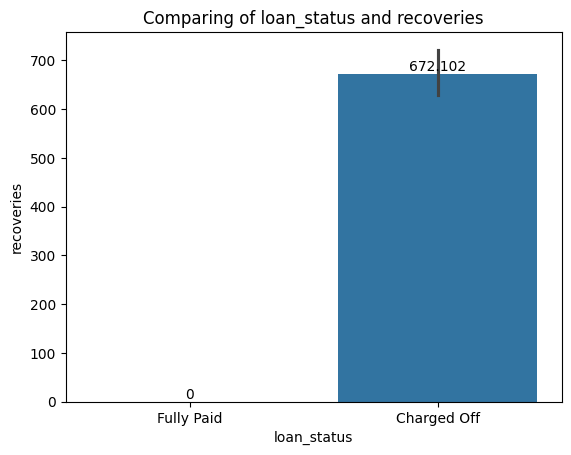

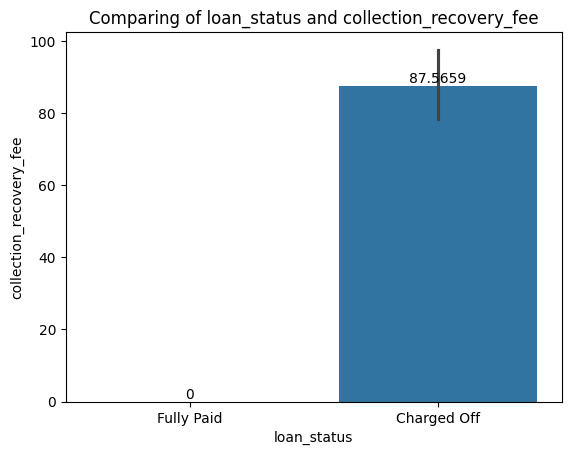

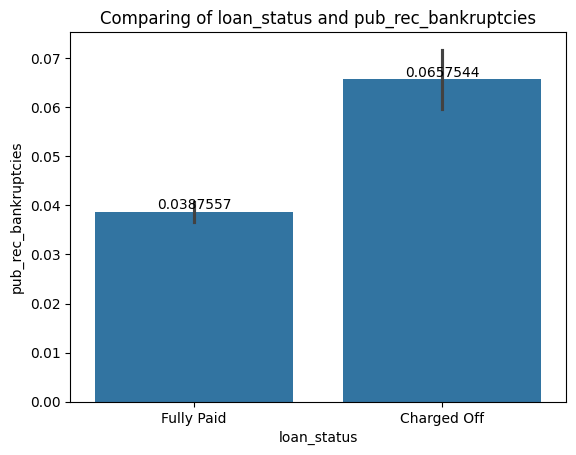

In [89]:
# Comparing loan_status to numeric columns to find coorelation on avg.
plt.figure(figsize=(10, 6))
number_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'revol_util', 'revol_bal',  'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'pub_rec_bankruptcies']
for col in number_columns:
    create_bar_plot_two_val(clean_data_03, 'loan_status', col)


<h3>Analysis for Grade to loan_status</h3>

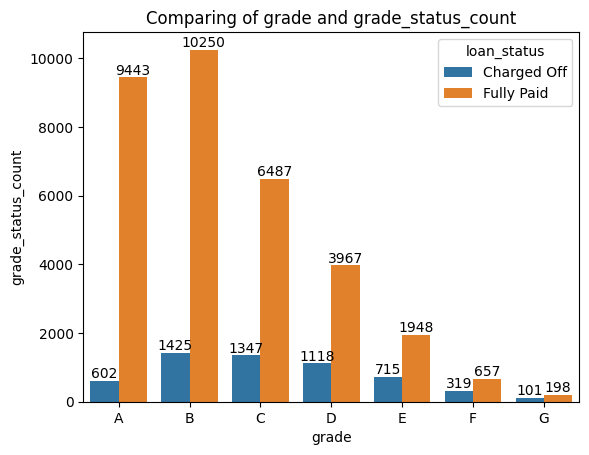

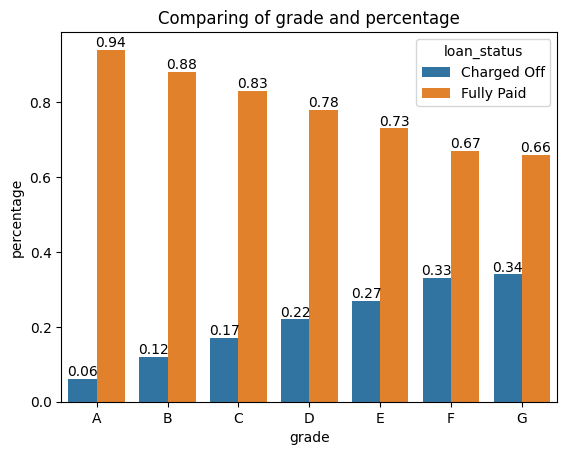

In [108]:
# Creating the percentage of status to grade chart.
grade_data = clean_data_03[['loan_status', 'grade']]
grade_status_group = grade_data.groupby(['grade', 'loan_status']).agg(grade_status_count=('loan_status', 'count')).reset_index()
grade_total_group = grade_data.groupby('grade').agg(grade_total_count=('loan_status', 'count')).reset_index()
create_bar_plot_two_val(grade_status_group, 'grade', 'grade_status_count', hue='loan_status')
grade_group = pd.merge(grade_status_group, grade_total_group, on='grade')
grade_group['percentage'] = grade_group['grade_status_count'] / grade_group['grade_total_count']
grade_group['percentage'] = grade_group['percentage'].round(2)
create_bar_plot_two_val(grade_group, 'grade', 'percentage', hue='loan_status')

This clearly shows the risk of loan sanction for low grade loans.

<h3>Analysis on term and interest_rate vs loan_status</h3>

In [124]:
term_int_data = clean_data_03[['loan_status', 'term', 'int_rate']]
term_int_data

,loan_status,term,int_rate
0,Fully Paid,36 months,11.0
1,Charged Off,60 months,15.0
2,Fully Paid,36 months,16.0
3,Fully Paid,36 months,13.0
5,Fully Paid,36 months,8.0
...,...,...,...
39712,Fully Paid,36 months,8.0
39713,Fully Paid,36 months,10.0
39714,Fully Paid,36 months,8.0
39715,Fully Paid,36 months,7.0


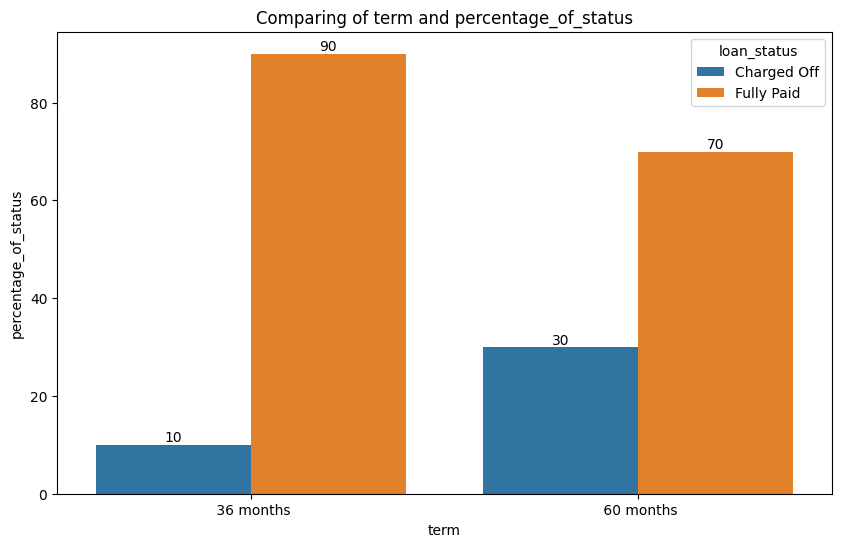

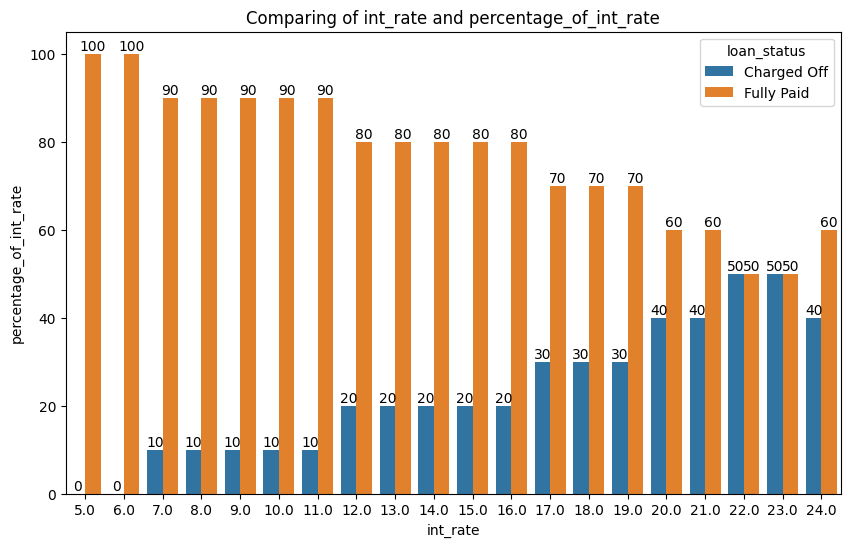

In [142]:
plt.figure(figsize=(10, 6))
term_status_int_group = term_int_data.groupby(['term', 'loan_status', 'int_rate']).agg(term_stat_int_count=('loan_status', 'count')).reset_index()
# Average interest rate per term
# create_bar_plot_two_val(term_status_group, 'term', 'int_rate')
# create_bar_plot_two_val(term_status_group, 'loan_status', 'int_rate')

term_status_group = term_int_data.groupby(['term', 'loan_status']).agg(term_status_count=('loan_status', 'count')).reset_index()
term_group = term_int_data.groupby('term').agg(term_total=('loan_status', 'count')).reset_index()
int_group = term_int_data.groupby('int_rate').agg(int_total=('loan_status', 'count')).reset_index()

status_int_group = term_int_data.groupby(['loan_status', 'int_rate']).agg(term_int_count=('int_rate', 'count')).reset_index()

term_status_merged = pd.merge(term_status_group, term_group, on='term')
term_status_merged['percentage_of_status'] = term_status_merged['term_status_count'] / term_status_merged['term_total']
term_status_merged['percentage_of_status'] = term_status_merged['percentage_of_status'].round(1) * 100
create_bar_plot_two_val(term_status_merged, 'term', 'percentage_of_status', hue='loan_status')
term_int_merged = pd.merge(status_int_group, int_group, on='int_rate')
term_int_merged['percentage_of_int_rate'] = term_int_merged['term_int_count'] / term_int_merged['int_total']
term_int_merged['percentage_of_int_rate'] = term_int_merged['percentage_of_int_rate'].round(1) * 100
plt.figure(figsize=(10, 6))

create_bar_plot_two_val(term_int_merged, 'int_rate', 'percentage_of_int_rate', hue='loan_status')
